In [36]:
import pandas as pd

# Cargar el archivo histórico hasta marzo 2022 (casos + hospitalizaciones + UCI + fallecidos)
df_hist = pd.read_csv("data/casos_hosp_uci_def_sexo_edad_provres.csv")

# Cargar el archivo más reciente (solo hospitalizaciones, UCI, defunciones desde marzo 2022)
df_reciente = pd.read_csv("data/hosp_uci_def_sexo_edad_provres_todas_edades.csv")

# Mostrar un vistazo
print("Histórico:", df_hist.shape)
print("Reciente:", df_reciente.shape)
df_hist.head()


Histórico: (1299030, 8)
Reciente: (739350, 7)


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


In [37]:
print("\nColumnas histórico:")
print(df_hist.columns.tolist())

print("\nColumnas reciente:")
print(df_reciente.columns.tolist())


Columnas histórico:
['provincia_iso', 'sexo', 'grupo_edad', 'fecha', 'num_casos', 'num_hosp', 'num_uci', 'num_def']

Columnas reciente:
['provincia_iso', 'sexo', 'grupo_edad', 'fecha', 'num_hosp', 'num_uci', 'num_def']


In [38]:
df_reciente["num_casos"] = pd.NA

In [39]:
# Unificar formato de fecha
df_hist["fecha"] = pd.to_datetime(df_hist["fecha"])
df_reciente["fecha"] = pd.to_datetime(df_reciente["fecha"])

# Orden de columnas consistente
columnas_ordenadas = ["provincia_iso", "sexo", "grupo_edad", "fecha", "num_casos", "num_hosp", "num_uci", "num_def"]
df_hist = df_hist[columnas_ordenadas]
df_reciente = df_reciente[columnas_ordenadas]

# Unimos ambos
df = pd.concat([df_hist, df_reciente], ignore_index=True)

# Verificación
print("Unificado:", df.shape)
df.head()


Unificado: (2038380, 8)


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


In [40]:
mapa_comunidades = {
    'A': 'Comunidad Valenciana',
    'AB': 'Castilla-La Mancha',
    'AL': 'Andalucía',
    'AV': 'Castilla y León',
    'B': 'Cataluña',
    'BA': 'Extremadura',
    'BI': 'País Vasco',
    'BU': 'Castilla y León',
    'C': 'Galicia',
    'CA': 'Andalucía',
    'CC': 'Extremadura',
    'CE': 'Ceuta y Melilla',
    'CO': 'Andalucía',
    'CR': 'Castilla-La Mancha',
    'CS': 'Comunidad Valenciana',
    'CU': 'Castilla-La Mancha',
    'GC': 'Canarias',
    'GI': 'Cataluña',
    'GR': 'Andalucía',
    'GU': 'Castilla-La Mancha',
    'H': 'Andalucía',
    'HU': 'Aragón',
    'J': 'Andalucía',
    'L': 'Cataluña',
    'LE': 'Castilla y León',
    'LO': 'La Rioja',
    'LU': 'Galicia',
    'M': 'Madrid',
    'MA': 'Andalucía',
    'ML': 'Ceuta y Melilla',
    'MU': 'Murcia',
    'NC': 'Navarra',
    'O': 'Asturias',
    'OR': 'Galicia',
    'P': 'Castilla y León',
    'PM': 'Baleares',
    'PO': 'Galicia',
    'S': 'Cantabria',
    'SA': 'Castilla y León',
    'SE': 'Andalucía',
    'SG': 'Castilla y León',
    'SO': 'Castilla y León',
    'SS': 'País Vasco',
    'T': 'Cataluña',
    'TE': 'Aragón',
    'TF': 'Canarias',
    'TO': 'Castilla-La Mancha',
    'V': 'Comunidad Valenciana',
    'VA': 'Castilla y León',
    'VI': 'País Vasco',
    'Z': 'Aragón',
    'ZA': 'Castilla y León'
}


In [41]:
df["comunidad"] = df["provincia_iso"].map(mapa_comunidades)


In [42]:
df[df["comunidad"].isnull()]["provincia_iso"].unique()


array([nan], dtype=object)

In [43]:
df = df.dropna(subset=["comunidad"])


In [45]:
df_agregado = df.groupby(["comunidad", "fecha"])[["num_casos", "num_hosp", "num_uci", "num_def"]].sum(numeric_only=True).reset_index()


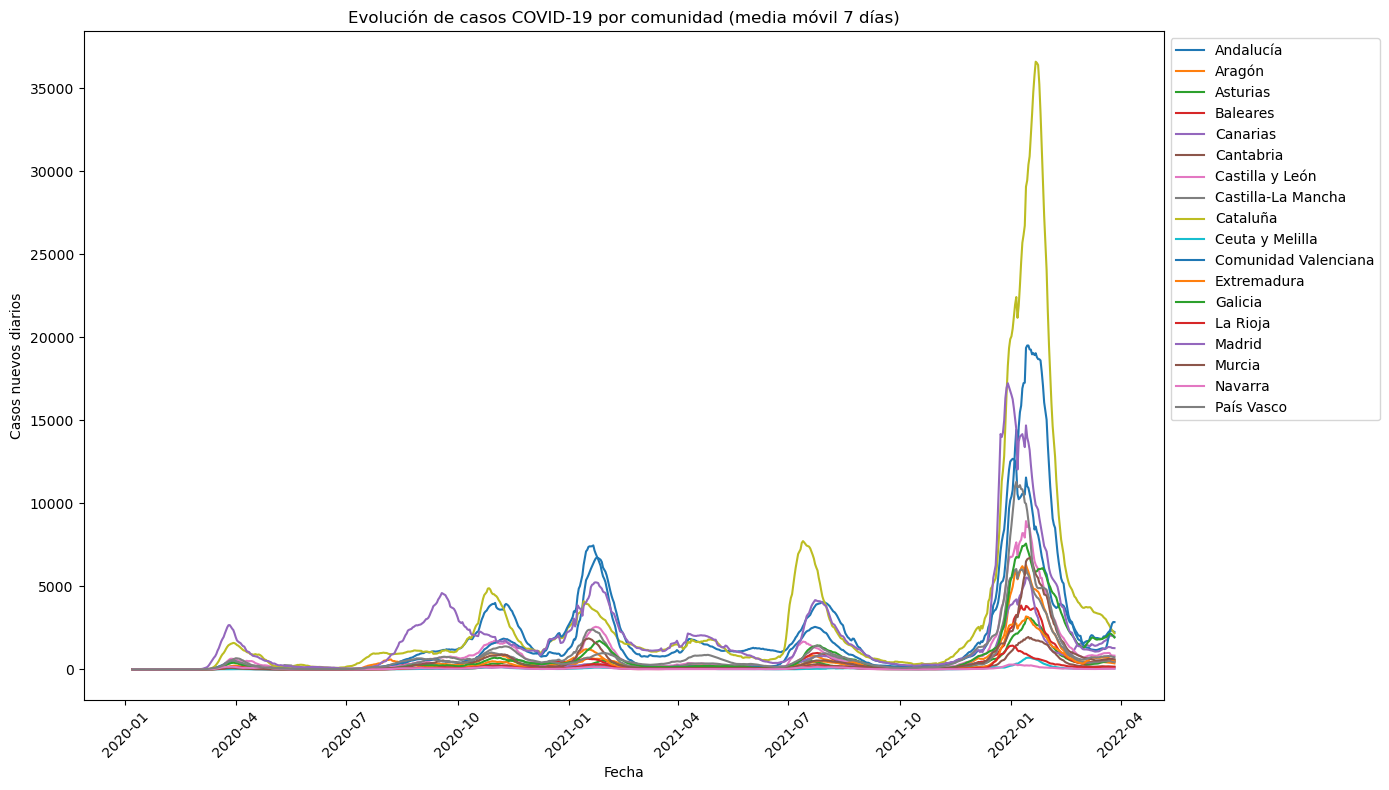

In [56]:
# Agrupar solo datos con num_casos (hasta marzo 2022)
df_hist["fecha"] = pd.to_datetime(df_hist["fecha"])
df_hist["comunidad"] = df_hist["provincia_iso"].map(mapa_comunidades)
df_hist = df_hist.dropna(subset=["comunidad"])
df_hist_agregado = df_hist.groupby(["comunidad", "fecha"])[["num_casos"]].sum().reset_index()

# Graficar cada comunidad
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for comunidad in df_hist_agregado["comunidad"].unique():
    datos = df_hist_agregado[df_hist_agregado["comunidad"] == comunidad].copy()
    datos = datos.sort_values("fecha")
    datos["media_7d"] = datos["num_casos"].rolling(window=7).mean()
    plt.plot(datos["fecha"], datos["media_7d"], label=comunidad)

plt.title("Evolución de casos COVID-19 por comunidad (media móvil 7 días)")
plt.xlabel("Fecha")
plt.ylabel("Casos nuevos diarios")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()



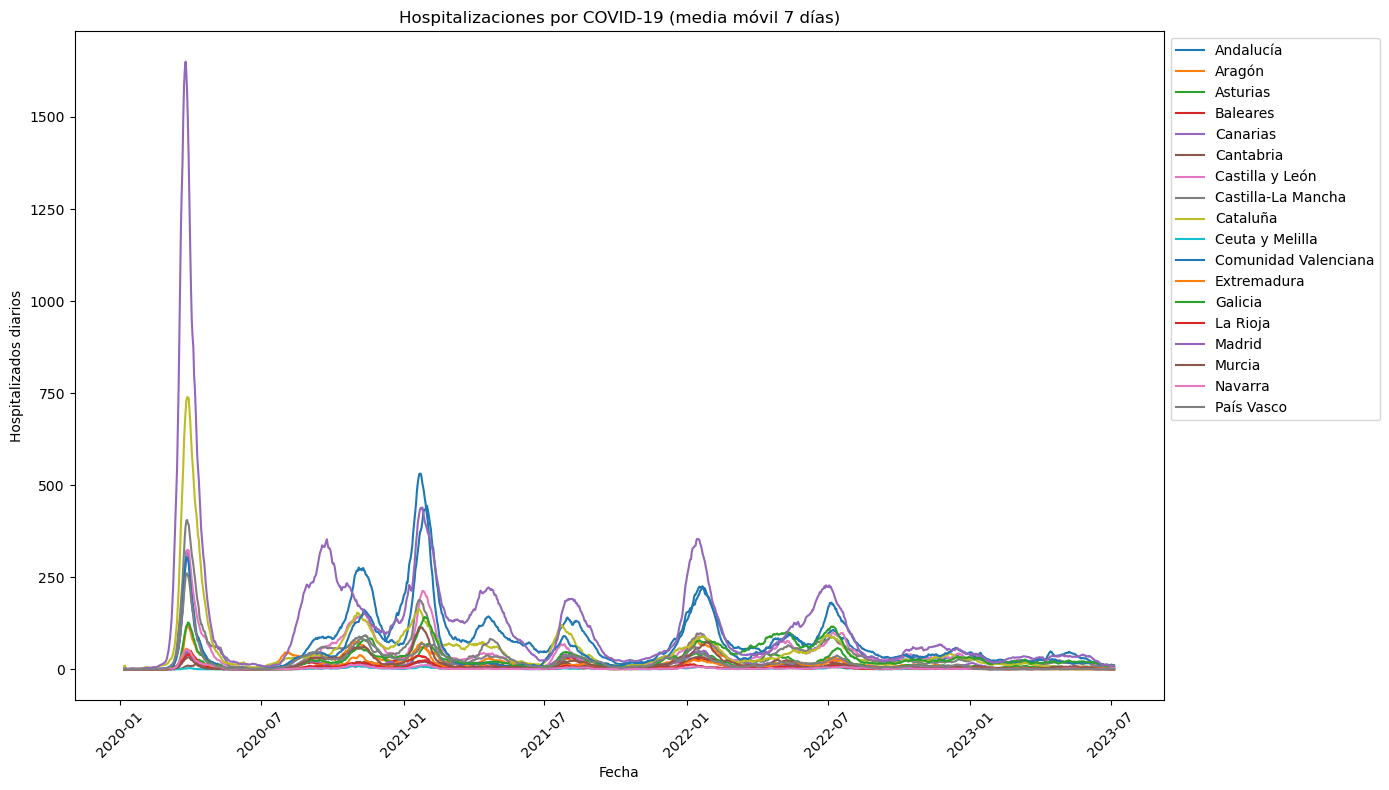

In [57]:
df_agregado["fecha"] = pd.to_datetime(df_agregado["fecha"])

plt.figure(figsize=(14, 8))
for comunidad in df_agregado["comunidad"].unique():
    datos = df_agregado[df_agregado["comunidad"] == comunidad].copy()
    datos = datos.sort_values("fecha")
    datos["media_7d"] = datos["num_hosp"].rolling(window=7).mean()
    plt.plot(datos["fecha"], datos["media_7d"], label=comunidad)

plt.title("Hospitalizaciones por COVID-19 (media móvil 7 días)")
plt.xlabel("Fecha")
plt.ylabel("Hospitalizados diarios")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()



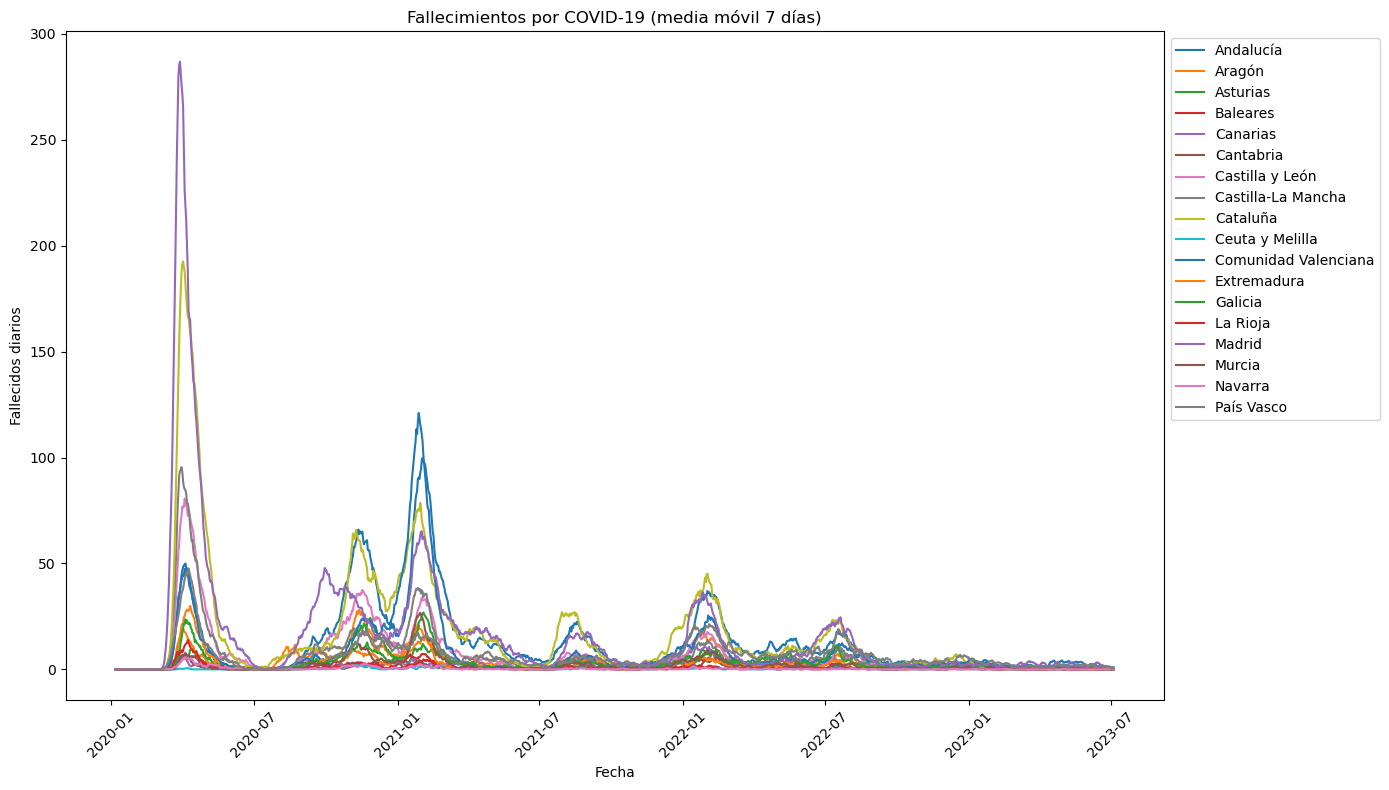

In [58]:
plt.figure(figsize=(14, 8))
for comunidad in df_agregado["comunidad"].unique():
    datos = df_agregado[df_agregado["comunidad"] == comunidad].copy()
    datos = datos.sort_values("fecha")
    datos["media_7d"] = datos["num_def"].rolling(window=7).mean()
    plt.plot(datos["fecha"], datos["media_7d"], label=comunidad)

plt.title("Fallecimientos por COVID-19 (media móvil 7 días)")
plt.xlabel("Fecha")
plt.ylabel("Fallecidos diarios")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()



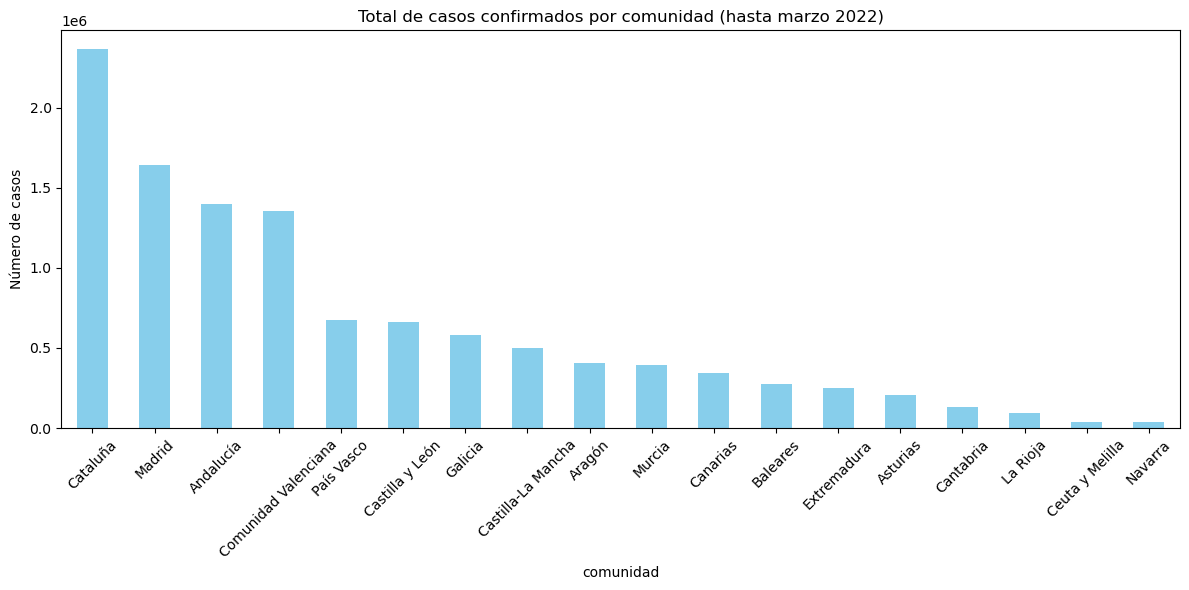

In [59]:
ranking_casos = df_hist.groupby("comunidad")["num_casos"].sum().sort_values(ascending=False)

ranking_casos.plot(kind="bar", figsize=(12, 6), color="skyblue")
plt.title("Total de casos confirmados por comunidad (hasta marzo 2022)")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


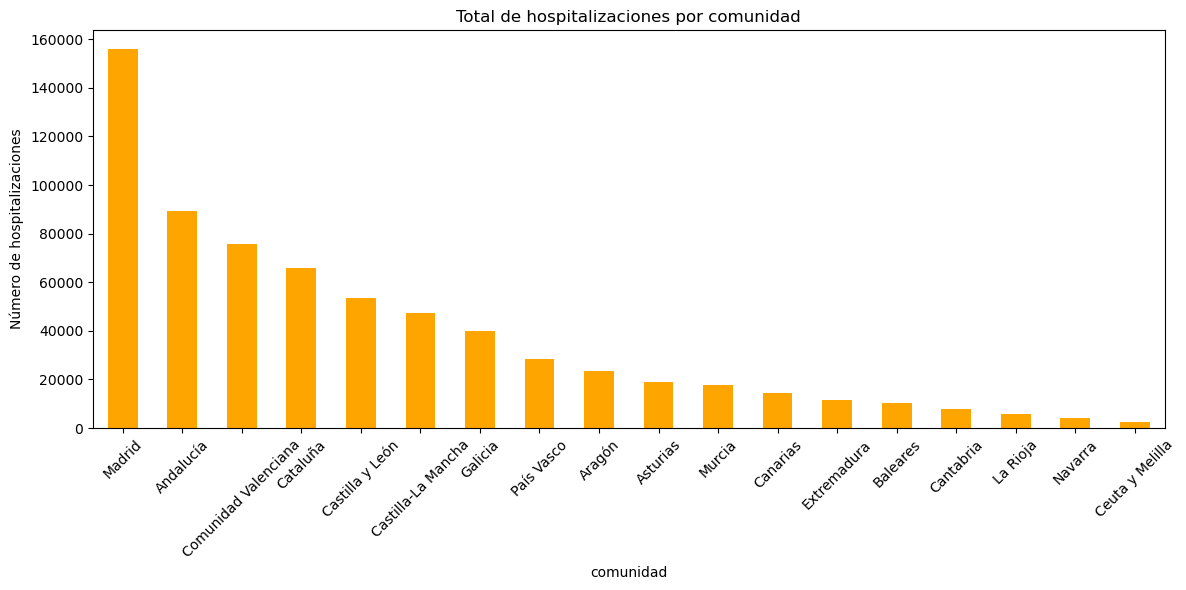

In [60]:
ranking_hosp = df_agregado.groupby("comunidad")["num_hosp"].sum().sort_values(ascending=False)

ranking_hosp.plot(kind="bar", figsize=(12, 6), color="orange")
plt.title("Total de hospitalizaciones por comunidad")
plt.ylabel("Número de hospitalizaciones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


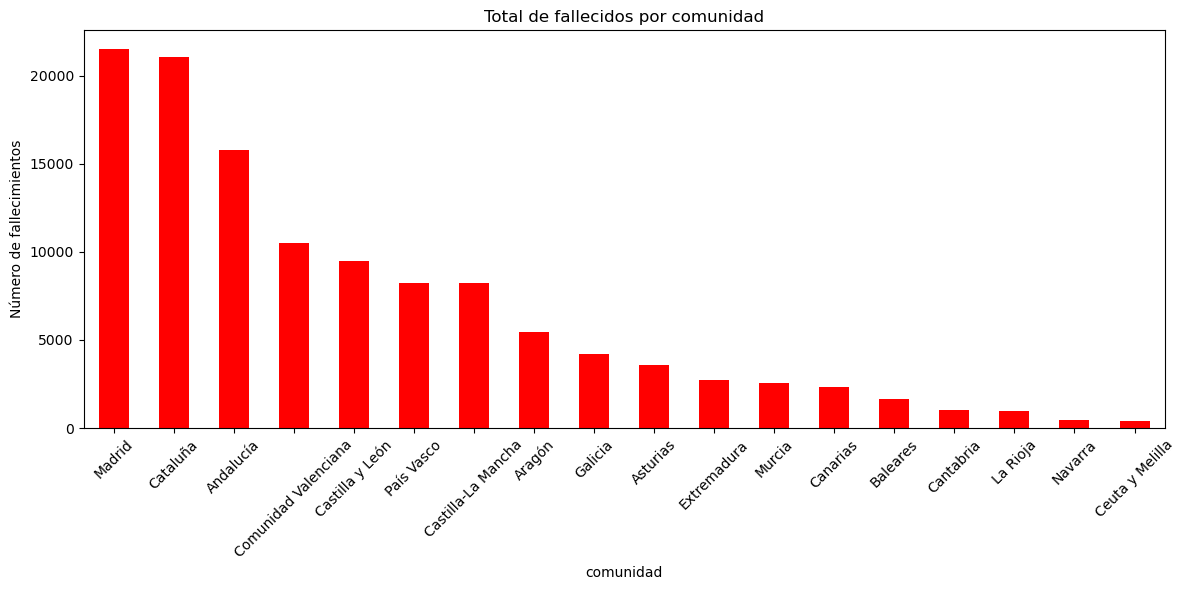

In [61]:
ranking_def = df_agregado.groupby("comunidad")["num_def"].sum().sort_values(ascending=False)

ranking_def.plot(kind="bar", figsize=(12, 6), color="red")
plt.title("Total de fallecidos por comunidad")
plt.ylabel("Número de fallecimientos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [67]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt


# --------------------------
# CARGA Y PROCESADO DE DATOS
# --------------------------
@st.cache_data

def load_data():
    # Cargar los archivos oficiales del ISCIII
    df_hist = pd.read_csv("data/casos_hosp_uci_def_sexo_edad_provres.csv", parse_dates=["fecha"])
    df_reciente = pd.read_csv("data/hosp_uci_def_sexo_edad_provres_todas_edades.csv", parse_dates=["fecha"])

    # Diccionario completo de provincias -> comunidades
    mapa_comunidades = {
        'A': 'Comunidad Valenciana','AB': 'Castilla-La Mancha','AL': 'Andalucía','AV': 'Castilla y León','B': 'Cataluña','BA': 'Extremadura','BI': 'País Vasco','BU': 'Castilla y León',
        'C': 'Galicia','CA': 'Andalucía','CC': 'Extremadura','CE': 'Ceuta y Melilla','CO': 'Andalucía','CR': 'Castilla-La Mancha','CS': 'Comunidad Valenciana','CU': 'Castilla-La Mancha',
        'GC': 'Canarias','GI': 'Cataluña','GR': 'Andalucía','GU': 'Castilla-La Mancha','H': 'Andalucía','HU': 'Aragón','J': 'Andalucía','L': 'Cataluña','LE': 'Castilla y León',
        'LO': 'La Rioja','LU': 'Galicia','M': 'Madrid','MA': 'Andalucía','ML': 'Ceuta y Melilla','MU': 'Murcia','NC': 'Navarra','O': 'Asturias','OR': 'Galicia','P': 'Castilla y León',
        'PM': 'Baleares','PO': 'Galicia','S': 'Cantabria','SA': 'Castilla y León','SE': 'Andalucía','SG': 'Castilla y León','SO': 'Castilla y León','SS': 'País Vasco',
        'T': 'Cataluña','TE': 'Aragón','TF': 'Canarias','TO': 'Castilla-La Mancha','V': 'Comunidad Valenciana','VA': 'Castilla y León','VI': 'País Vasco','Z': 'Aragón','ZA': 'Castilla y León'
    }

    # Añadir comunidad a ambos DataFrames
    df_hist["comunidad"] = df_hist["provincia_iso"].map(mapa_comunidades)
    df_reciente["comunidad"] = df_reciente["provincia_iso"].map(mapa_comunidades)

    # Añadir columna vacía de num_casos al reciente (no está disponible)
    df_reciente["num_casos"] = pd.NA

    # Asegurar orden de columnas y unión
    columnas = ["provincia_iso", "sexo", "grupo_edad", "fecha", "num_casos", "num_hosp", "num_uci", "num_def", "comunidad"]
    df_hist = df_hist[columnas].dropna(subset=["comunidad"])
    df_reciente = df_reciente[columnas].dropna(subset=["comunidad"])

    df = pd.concat([df_hist, df_reciente])

    # Agregar por comunidad y fecha
    df_agregado = df.groupby(["comunidad", "fecha"])[["num_casos", "num_hosp", "num_uci", "num_def"]].sum(numeric_only=True).reset_index()
    return df_agregado

# --------------------------
# INTERFAZ STREAMLIT
# --------------------------

df = load_data()
st.title(" Evolución del COVID-19 en España")
st.markdown("Visualiza la evolución diaria por comunidad autónoma y métrica seleccionada.")

comunidad = st.selectbox("Selecciona una comunidad autónoma:", sorted(df["comunidad"].unique()))
metrica_opciones = {
    "Casos confirmados": "num_casos",
    "Hospitalizados": "num_hosp",
    "UCI": "num_uci",
    "Fallecidos": "num_def"
}
metrica_label = st.selectbox("Selecciona la métrica a visualizar:", list(metrica_opciones.keys()))
metrica = metrica_opciones[metrica_label]

# --------------------------
# VISUALIZACIÓN
# --------------------------

datos = df[df["comunidad"] == comunidad].copy()
datos = datos.sort_values("fecha")

try:
    datos["media_7d"] = datos[metrica].rolling(window=7).mean()
    st.line_chart(datos.set_index("fecha")["media_7d"])
except KeyError:
    st.warning(f"La métrica '{metrica}' no está disponible para esta comunidad o periodo.")



2025-05-23 05:15:56.964 No runtime found, using MemoryCacheStorageManager
2025-05-23 05:15:56.968 No runtime found, using MemoryCacheStorageManager
2025-05-23 05:15:56.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 05:15:56.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 05:15:56.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 05:15:57.479 Thread 'Thread-14': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 05:15:57.485 Thread 'Thread-14': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 05:16:00.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 05:16:00.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored